In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 

import mdtraj as md

import numpy as np
from tqdm import tqdm
from pathlib import Path
import os
from natsort import natsorted

In [ ]:
protein = 'egfr'
save_dir = Path(f'data_{protein}/plots/')

In [3]:
f_dunbrack = natsorted([str(d) for d in Path(f'./data_{protein}/ftrajs/').glob('run*-clone*_dbdist.npy')])
traj_lengths = [np.load(path).shape[0] for path in f_dunbrack]

In [4]:
print(f'{np.sum(traj_lengths)/1000000} ms')
print(max(traj_lengths))

36.723596 ms
32600


Total amount of simulation times of trajectories in bins 

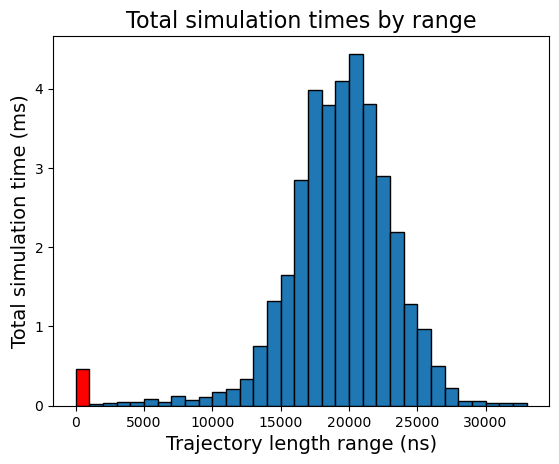

In [5]:
bins = np.linspace(0, 33000, 34)
bin_indices = np.digitize(traj_lengths, bins)

# Calculate the total length in each bin
total_lengths = np.zeros(len(bins))
for idx, length in zip(bin_indices, traj_lengths):
    total_lengths[idx-1] += length  # Subtract 1 because indices are 1-based

fig, ax = plt.subplots()
bars = ax.bar(bins[:-1], total_lengths[:-1]/1000000, width=np.diff(bins), align='edge', edgecolor='black')
bars[0].set_facecolor('red')

ax.set_xlabel('Trajectory length range (ns)', fontsize=14)
ax.set_ylabel('Total simulation time (ms)', fontsize=14)
ax.set_title('Total simulation times by range', fontsize=16)

plt.savefig(save_dir / 'total_length_hist.png')
plt.show()